In [9]:
import pandas as pd
aqi = pd.read_csv("AQI.csv")
aqi=aqi[aqi["TimePeriod"]==2019]
aqi

,TimePeriod,Geography,AQI
0,2019,Bayside - Little Neck,29
1,2019,Bedford Stuyvesant - Crown Heights,28
2,2019,Bensonhurst - Bay Ridge,29
3,2019,Borough Park,28
4,2019,Canarsie - Flatlands,31
5,2019,Central Harlem - Morningside Heights,29
6,2019,Chelsea - Clinton,42
7,2019,Coney Island - Sheepshead Bay,31
8,2019,Crotona -Tremont,30
9,2019,Downtown - Heights - Slope,31


In [7]:
vegCover = pd.read_csv("Factors_VegetativeCover.csv")
vegCover = vegCover.drop(columns=["GeoTypeDesc", "GeoID", "GeoRank", "TimePeriod"])
vegCover

,Geography,Percent
0,Kingsbridge - Riverdale,63.0
1,Northeast Bronx,36.0
2,Fordham - Bronx Pk,40.0
3,Pelham - Throgs Neck,46.0
4,Crotona -Tremont,32.0
5,High Bridge - Morrisania,21.0
6,Hunts Point - Mott Haven,18.0
7,Greenpoint,14.0
8,Downtown - Heights - Slope,22.0
9,Bedford Stuyvesant - Crown Heights,25.0


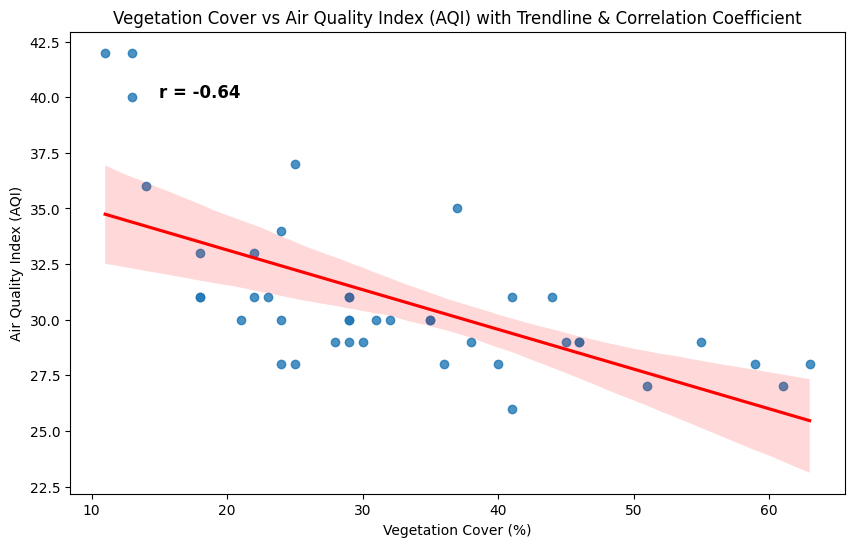

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import matplotlib.patches as mpatches

# Rename columns for consistency
vegCover = vegCover.rename(columns={'Percent': 'Vegetation Cover'})
aqi = aqi.rename(columns={'AQI': 'Air Quality Index'})

# Merge DataFrames on 'Geography'
merged_df = pd.merge(vegCover, aqi, on='Geography')

# Calculate Pearson correlation coefficient
corr_coef, p_value = pearsonr(merged_df['Vegetation Cover'], merged_df['Air Quality Index'])

# Create the plot
plt.figure(figsize=(10, 6))

# Scatter plot with trendline and confidence interval
ax = sns.regplot(data=merged_df, x='Vegetation Cover', y='Air Quality Index', 
                 scatter=True, line_kws={"color": "red"})

# Annotate correlation coefficient on the plot
plt.text(merged_df['Vegetation Cover'].min() + 4,  # X-coordinate
         merged_df['Air Quality Index'].max() - 2,  # Y-coordinate
         corr_legend, fontsize=12, color="black", fontweight="bold")

# Labels and title
plt.xlabel("Vegetation Cover (%)")
plt.ylabel("Air Quality Index (AQI)")
plt.title("Vegetation Cover vs Air Quality Index (AQI) with Trendline & Correlation Coefficient")

# Show the plot
plt.show()

In [27]:
bikeCov = pd.read_csv("Factors_BikeCoverage.csv")
bikeCov = bikeCov.drop(columns=["GeoTypeDesc", "GeoID", "GeoRank", "TimePeriod"])
bikeCov

,Geography,Percent
0,Kingsbridge - Riverdale,7.0
1,Northeast Bronx,9.0
2,Fordham - Bronx Pk,12.0
3,Pelham - Throgs Neck,8.0
4,Crotona -Tremont,14.0
5,High Bridge - Morrisania,15.0
6,Hunts Point - Mott Haven,18.0
7,Greenpoint,17.0
8,Downtown - Heights - Slope,28.0
9,Bedford Stuyvesant - Crown Heights,19.0


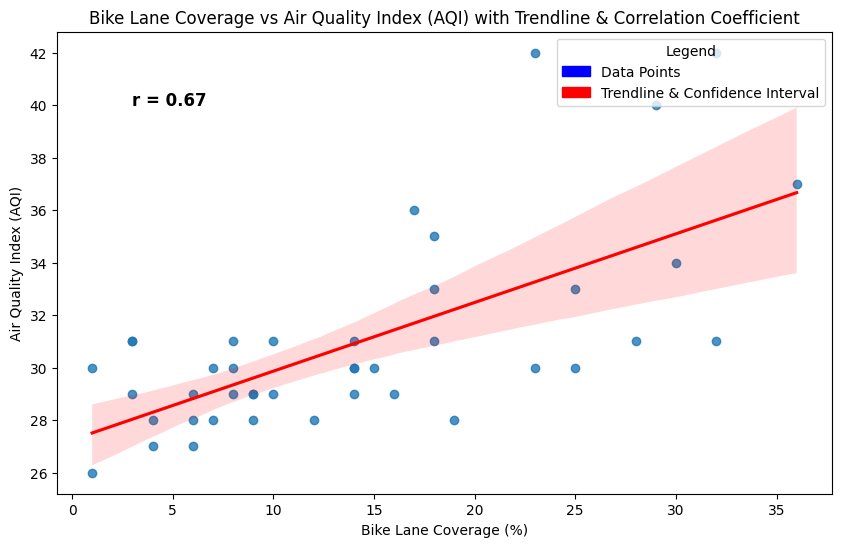

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import matplotlib.patches as mpatches

# Rename columns for consistency
bikeCov = bikeCov.rename(columns={'Percent': 'Bike Lane Coverage'})
aqi = aqi.rename(columns={'AQI': 'Air Quality Index'})

# Merge DataFrames on 'Geography'
merged_df = pd.merge(bikeCov, aqi, on='Geography')

# Calculate Pearson correlation coefficient
corr_coef, p_value = pearsonr(merged_df['Bike Lane Coverage'], merged_df['Air Quality Index'])

# Create the plot
plt.figure(figsize=(10, 6))

# Scatter plot with trendline and confidence interval
ax = sns.regplot(data=merged_df, x='Bike Lane Coverage', y='Air Quality Index', 
                 scatter=True, line_kws={"color": "red"})

# Create custom legend entries
scatter_legend = mpatches.Patch(color="blue", label="Data Points")
line_legend = mpatches.Patch(color="red", label="Trendline & Confidence Interval")
corr_legend = f"r = {corr_coef:.2f}"  # Correlation coefficient text

# Add legend to the plot
plt.legend(handles=[scatter_legend, line_legend], loc="upper right", fontsize=10, title="Legend")

# Annotate correlation coefficient on the plot
plt.text(merged_df['Bike Lane Coverage'].min() + 2,  # X-coordinate
         merged_df['Air Quality Index'].max() - 2,  # Y-coordinate
         corr_legend, fontsize=12, color="black", fontweight="bold")

# Labels and title
plt.xlabel("Bike Lane Coverage (%)")
plt.ylabel("Air Quality Index (AQI)")
plt.title("Bike Lane Coverage vs Air Quality Index (AQI) with Trendline & Correlation Coefficient")

# Show the plot
plt.show()

In [32]:
subwayDens = pd.read_csv("Factors_SubwayDensity.csv")
subwayDens = subwayDens.drop(columns=["GeoTypeDesc", "GeoID", "GeoRank", "TimePeriod"])
subwayDens

,Geography,Density
0,Kingsbridge - Riverdale,0.3
1,Northeast Bronx,0.5
2,Fordham - Bronx Pk,1.1
3,Pelham - Throgs Neck,0.4
4,Crotona -Tremont,0.9
5,High Bridge - Morrisania,1.3
6,Hunts Point - Mott Haven,1.1
7,Greenpoint,1.0
8,Downtown - Heights - Slope,1.7
9,Bedford Stuyvesant - Crown Heights,1.8


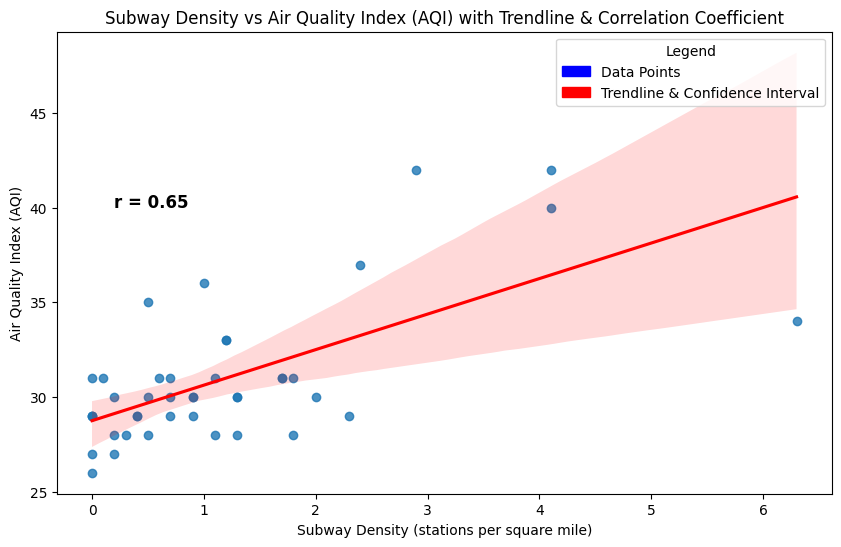

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import matplotlib.patches as mpatches

# Rename columns for consistency
subwayDens = subwayDens.rename(columns={'Density': 'Subway Density'})
aqi = aqi.rename(columns={'AQI': 'Air Quality Index'})

# Merge DataFrames on 'Geography'
merged_df = pd.merge(subwayDens, aqi, on='Geography')

# Calculate Pearson correlation coefficient
corr_coef, p_value = pearsonr(merged_df['Subway Density'], merged_df['Air Quality Index'])

# Create the plot
plt.figure(figsize=(10, 6))

# Scatter plot with trendline and confidence interval
ax = sns.regplot(data=merged_df, x='Subway Density', y='Air Quality Index', 
                 scatter=True, line_kws={"color": "red"})

# Create custom legend entries
scatter_legend = mpatches.Patch(color="blue", label="Data Points")
line_legend = mpatches.Patch(color="red", label="Trendline & Confidence Interval")
corr_legend = f"r = {corr_coef:.2f}"  # Correlation coefficient text

# Add legend to the plot
plt.legend(handles=[scatter_legend, line_legend], loc="upper right", fontsize=10, title="Legend")

# Annotate correlation coefficient on the plot
plt.text(merged_df['Subway Density'].min() + 0.2,  # Adjusting placement based on density values
         merged_df['Air Quality Index'].max() - 2,  # Y-coordinate
         corr_legend, fontsize=12, color="black", fontweight="bold")

# Labels and title
plt.xlabel("Subway Density (stations per square mile)")
plt.ylabel("Air Quality Index (AQI)")
plt.title("Subway Density vs Air Quality Index (AQI) with Trendline & Correlation Coefficient")

# Show the plot
plt.show()

In [37]:
sidewalkDens = pd.read_csv("Factors_Sidewalks.csv")
sidewalkDens = sidewalkDens.drop(columns=["GeoTypeDesc", "GeoID", "GeoRank", "TimePeriod"])
sidewalkDens

,Geography,Percent of land area
0,Kingsbridge - Riverdale,3.5
1,Northeast Bronx,6.9
2,Fordham - Bronx Pk,7.1
3,Pelham - Throgs Neck,4.9
4,Crotona -Tremont,8.6
5,High Bridge - Morrisania,9.7
6,Hunts Point - Mott Haven,6.8
7,Greenpoint,9.3
8,Downtown - Heights - Slope,8.8
9,Bedford Stuyvesant - Crown Heights,10.5


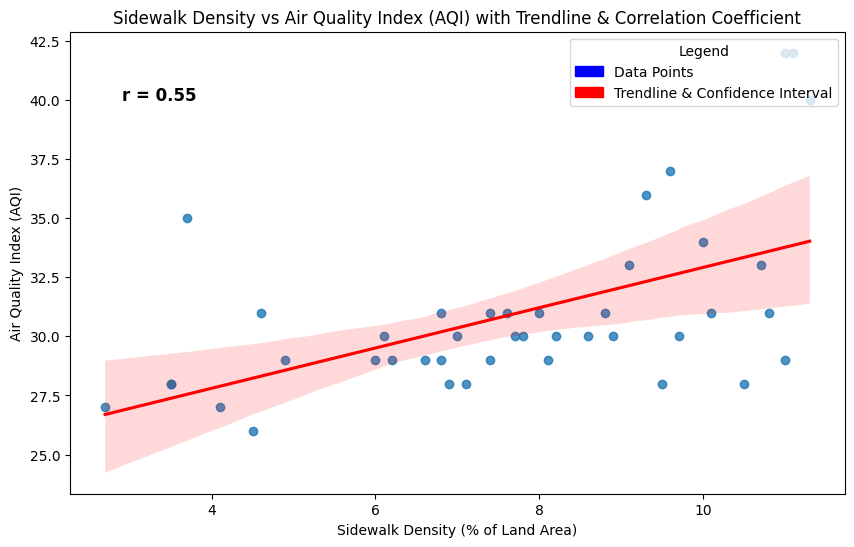

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import matplotlib.patches as mpatches

# Rename columns for consistency
sidewalkDens = sidewalkDens.rename(columns={'Percent of land area': 'Sidewalk Density'})
aqi = aqi.rename(columns={'AQI': 'Air Quality Index'})

# Merge DataFrames on 'Geography'
merged_df = pd.merge(sidewalkDens, aqi, on='Geography')

# Calculate Pearson correlation coefficient
corr_coef, p_value = pearsonr(merged_df['Sidewalk Density'], merged_df['Air Quality Index'])

# Create the plot
plt.figure(figsize=(10, 6))

# Scatter plot with trendline and confidence interval
ax = sns.regplot(data=merged_df, x='Sidewalk Density', y='Air Quality Index', 
                 scatter=True, line_kws={"color": "red"})

# Create custom legend entries
scatter_legend = mpatches.Patch(color="blue", label="Data Points")
line_legend = mpatches.Patch(color="red", label="Trendline & Confidence Interval")
corr_legend = f"r = {corr_coef:.2f}"  # Correlation coefficient text

# Add legend to the plot
plt.legend(handles=[scatter_legend, line_legend], loc="upper right", fontsize=10, title="Legend")

# Annotate correlation coefficient on the plot
plt.text(merged_df['Sidewalk Density'].min() + 0.2,  # Adjusting placement based on sidewalk density values
         merged_df['Air Quality Index'].max() - 2,  # Y-coordinate
         corr_legend, fontsize=12, color="black", fontweight="bold")

# Labels and title
plt.xlabel("Sidewalk Density (% of Land Area)")
plt.ylabel("Air Quality Index (AQI)")
plt.title("Sidewalk Density vs Air Quality Index (AQI) with Trendline & Correlation Coefficient")

# Show the plot
plt.show()

In [39]:
walkability = pd.read_csv("Factors_Walkability.csv")
walkability = walkability.drop(columns=["GeoTypeDesc", "GeoID", "GeoRank", "TimePeriod"])
walkability

,Geography,Score
0,Kingsbridge - Riverdale,-2
1,Northeast Bronx,-1
2,Fordham - Bronx Pk,1
3,Pelham - Throgs Neck,-1
4,Crotona -Tremont,2
5,High Bridge - Morrisania,2
6,Hunts Point - Mott Haven,1
7,Greenpoint,2
8,Downtown - Heights - Slope,3
9,Bedford Stuyvesant - Crown Heights,2


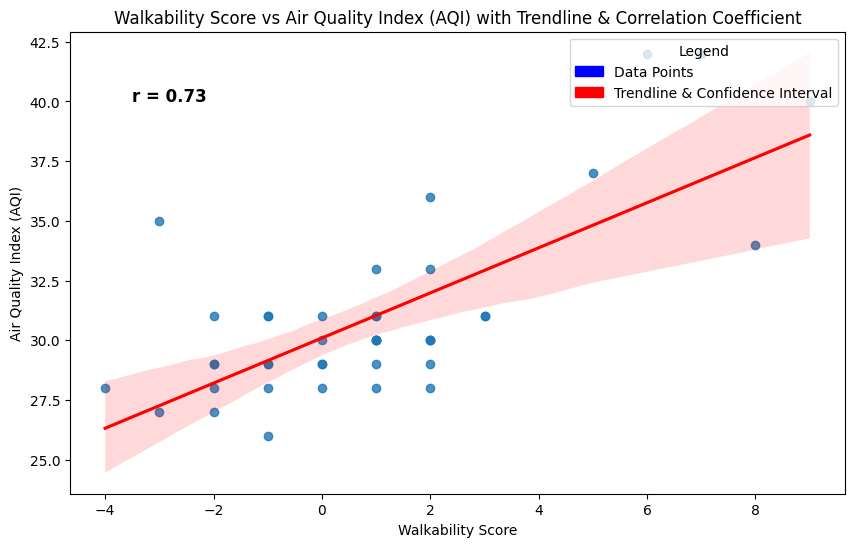

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import matplotlib.patches as mpatches

# Rename columns for consistency
walkability = walkability.rename(columns={'Score': 'Walkability Score'})
aqi = aqi.rename(columns={'AQI': 'Air Quality Index'})

# Merge DataFrames on 'Geography'
merged_df = pd.merge(walkability, aqi, on='Geography')

# Calculate Pearson correlation coefficient
corr_coef, p_value = pearsonr(merged_df['Walkability Score'], merged_df['Air Quality Index'])

# Create the plot
plt.figure(figsize=(10, 6))

# Scatter plot with trendline and confidence interval
ax = sns.regplot(data=merged_df, x='Walkability Score', y='Air Quality Index', 
                 scatter=True, line_kws={"color": "red"})

# Create custom legend entries
scatter_legend = mpatches.Patch(color="blue", label="Data Points")
line_legend = mpatches.Patch(color="red", label="Trendline & Confidence Interval")
corr_legend = f"r = {corr_coef:.2f}"  # Correlation coefficient text

# Add legend to the plot
plt.legend(handles=[scatter_legend, line_legend], loc="upper right", fontsize=10, title="Legend")

# Annotate correlation coefficient on the plot
plt.text(merged_df['Walkability Score'].min() + 0.5,  # Adjusting placement
         merged_df['Air Quality Index'].max() - 2,  # Y-coordinate
         corr_legend, fontsize=12, color="black", fontweight="bold")

# Labels and title
plt.xlabel("Walkability Score")
plt.ylabel("Air Quality Index (AQI)")
plt.title("Walkability Score vs Air Quality Index (AQI) with Trendline & Correlation Coefficient")

# Show the plot
plt.show()

In [41]:
vehicleMiles = pd.read_csv("Factors_Vehicles.csv")
vehicleMiles = vehicleMiles.drop(columns=["GeoTypeDesc", "GeoID", "GeoRank", "TimePeriod"])
vehicleMiles

,Geography,Million miles per square mile
0,Kingsbridge - Riverdale,80.8
1,Northeast Bronx,47.7
2,Fordham - Bronx Pk,60.0
3,Pelham - Throgs Neck,64.5
4,Crotona -Tremont,102.3
5,High Bridge - Morrisania,81.6
6,Hunts Point - Mott Haven,57.4
7,Greenpoint,88.6
8,Downtown - Heights - Slope,126.8
9,Bedford Stuyvesant - Crown Heights,82.6


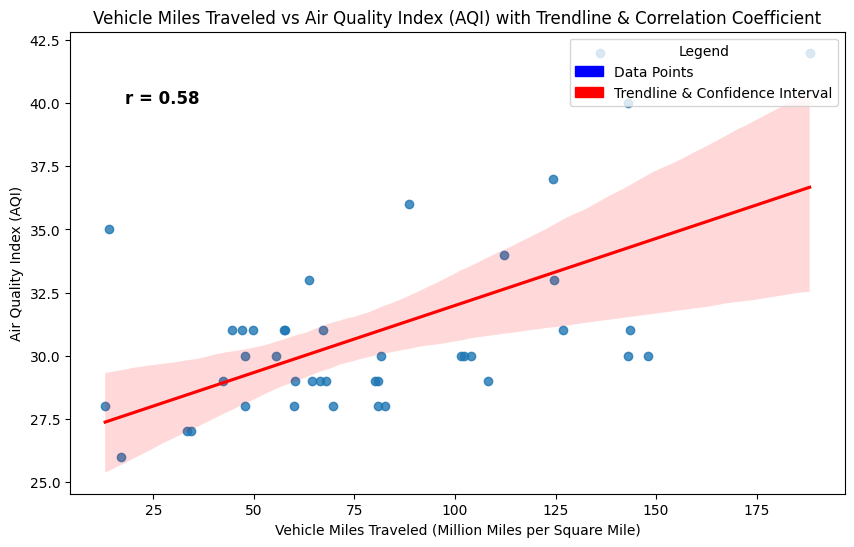

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import matplotlib.patches as mpatches

# Rename columns for consistency
vehicleMiles = vehicleMiles.rename(columns={'Million miles per square mile': 'Vehicle Miles Traveled'})
aqi = aqi.rename(columns={'AQI': 'Air Quality Index'})

# Merge DataFrames on 'Geography'
merged_df = pd.merge(vehicleMiles, aqi, on='Geography')

# Calculate Pearson correlation coefficient
corr_coef, p_value = pearsonr(merged_df['Vehicle Miles Traveled'], merged_df['Air Quality Index'])

# Create the plot
plt.figure(figsize=(10, 6))

# Scatter plot with trendline and confidence interval
ax = sns.regplot(data=merged_df, x='Vehicle Miles Traveled', y='Air Quality Index', 
                 scatter=True, line_kws={"color": "red"})

# Create custom legend entries
scatter_legend = mpatches.Patch(color="blue", label="Data Points")
line_legend = mpatches.Patch(color="red", label="Trendline & Confidence Interval")
corr_legend = f"r = {corr_coef:.2f}"  # Correlation coefficient text

# Add legend to the plot
plt.legend(handles=[scatter_legend, line_legend], loc="upper right", fontsize=10, title="Legend")

# Annotate correlation coefficient on the plot
plt.text(merged_df['Vehicle Miles Traveled'].min() + 5,  # Adjust placement
         merged_df['Air Quality Index'].max() - 2,  # Y-coordinate
         corr_legend, fontsize=12, color="black", fontweight="bold")

# Labels and title
plt.xlabel("Vehicle Miles Traveled (Million Miles per Square Mile)")
plt.ylabel("Air Quality Index (AQI)")
plt.title("Vehicle Miles Traveled vs Air Quality Index (AQI) with Trendline & Correlation Coefficient")

# Show the plot
plt.show()

In [47]:
recentBike = pd.read_csv("Factors_RecentBiking.csv")
recentBike = recentBike.drop(columns=["GeoTypeDesc", "GeoID", "GeoRank", "TimePeriod","Number"])

# Example: recentBike DataFrame
recentBike['Percent'] = recentBike['Percent'].astype(str).str.extract(r'(\d+\.?\d*)').astype(float)


recentBike

,Geography,Percent
0,Kingsbridge - Riverdale,0.5
1,Northeast Bronx,NaN
2,Fordham - Bronx Pk,5.8
3,Pelham - Throgs Neck,5.4
4,Greenpoint,16.6
5,Downtown - Heights - Slope,14.2
6,Bedford Stuyvesant - Crown Heights,10.6
7,East New York,5.7
8,Sunset Park,7.2
9,Borough Park,6.6


In [49]:
# Load the UHF34 dataset (replace 'uhf34_data.csv' with your actual file)
uhf34_df = recentBike

# Mapping of UHF34 to UHF42 neighborhoods
uhf34_to_uhf42 = {
    "Kingsbridge - Riverdale": ["Kingsbridge - Riverdale"],
    "Northeast Bronx": ["Northeast Bronx"],
    "Fordham - Bronx Pk": ["Fordham - Bronx Pk"],
    "Pelham - Throgs Neck": ["Pelham - Throgs Neck"],
    "Crotona -Tremont": ["Crotona -Tremont"],
    "High Bridge - Morrisania": ["High Bridge - Morrisania"],
    "Hunts Point - Mott Haven": ["Hunts Point - Mott Haven"],
    "Greenpoint": ["Greenpoint"],
    "Downtown - Heights - Slope": ["Downtown - Heights - Slope"],
    "Bedford Stuyvesant - Crown Heights": ["Bedford Stuyvesant - Crown Heights"],
    "East New York": ["East New York"],
    "Sunset Park": ["Sunset Park"],
    "Borough Park": ["Borough Park"],
    "East Flatbush - Flatbush": ["East Flatbush - Flatbush"],
    "Canarsie - Flatlands": ["Canarsie - Flatlands"],
    "Bensonhurst - Bay Ridge": ["Bensonhurst - Bay Ridge"],
    "Coney Island - Sheepshead Bay": ["Coney Island - Sheepshead Bay"],
    "Williamsburg - Bushwick": ["Williamsburg - Bushwick"],
    "Washington Heights": ["Washington Heights"],
    "Central Harlem - Morningside Heights": ["Central Harlem - Morningside Heights"],
    "East Harlem": ["East Harlem"],
    "Upper West Side": ["Upper West Side"],
    "Upper East Side": ["Upper East Side"],
    "Chelsea - Clinton": ["Chelsea - Clinton"],
    "Gramercy Park - Murray Hill": ["Gramercy Park - Murray Hill"],
    "Greenwich Village - SoHo": ["Greenwich Village - SoHo"],
    "Union Square - Lower East Side": ["Union Square - Lower East Side"],
    "Lower Manhattan": ["Lower Manhattan"],
    "Long Island City - Astoria": ["Long Island City - Astoria"],
    "West Queens": ["West Queens"],
    "Flushing - Clearview": ["Flushing - Clearview"],
    "Bayside - Little Neck": ["Bayside - Little Neck"],
    "Ridgewood - Forest Hills": ["Ridgewood - Forest Hills"],
    "Fresh Meadows": ["Fresh Meadows"],
    "Southwest Queens": ["Southwest Queens"],
    "Jamaica": ["Jamaica"],
    "Southeast Queens": ["Southeast Queens"],
    "Rockaways": ["Rockaways"],
    "Port Richmond": ["Port Richmond"],
    "Stapleton - St. George": ["Stapleton - St. George"],
    "Willowbrook": ["Willowbrook"],
    "South Beach - Tottenville": ["South Beach - Tottenville"]
}

# Transform the dataset to match UHF42 format
uhf42_data = []
for uhf34, uhf42_list in uhf34_to_uhf42.items():
    percent_value = uhf34_df.loc[uhf34_df['Geography'] == uhf34, 'Percent'].values
    if len(percent_value) > 0:
        percent_value = percent_value[0]
        for uhf42 in uhf42_list:
            uhf42_data.append([uhf42, percent_value])

uhf42_df = pd.DataFrame(uhf42_data, columns=["Geography", "Percent"])

# Save the new dataset
uhf42_df.to_csv('uhf42_data.csv', index=False)
uhf42_df

,Geography,Percent
0,Kingsbridge - Riverdale,0.5
1,Northeast Bronx,NaN
2,Fordham - Bronx Pk,5.8
3,Pelham - Throgs Neck,5.4
4,Greenpoint,16.6
5,Downtown - Heights - Slope,14.2
6,Bedford Stuyvesant - Crown Heights,10.6
7,East New York,5.7
8,Sunset Park,7.2
9,Borough Park,6.6
